In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('mtcars.csv')
df.shape

(32, 12)

In [3]:
## Altera os nomes das colunas 
df.columns = ['modelo', 'mpg', 'cilindros', 'deslocamento', 'potencia', 'relacao', 'peso', 'tempo_1.4_milha', 'motor_em_v', 'transmissao_automattica', 'marchas', 'carburadores']

In [4]:
df.describe() # Primeiras impressoes sobre o dataset

,mpg,cilindros,deslocamento,potencia,relacao,peso,tempo_1.4_milha,motor_em_v,transmissao_automattica,marchas,carburadores
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [5]:
df.corr() #apresenta correlação entre variáveis 

,mpg,cilindros,deslocamento,potencia,relacao,peso,tempo_1.4_milha,motor_em_v,transmissao_automattica,marchas,carburadores
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cilindros,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
deslocamento,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
potencia,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
relacao,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
peso,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
tempo_1.4_milha,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
motor_em_v,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
transmissao_automattica,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
marchas,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [6]:
df.isna().sum() # Checa dados faltantes

modelo                     0
mpg                        0
cilindros                  0
deslocamento               0
potencia                   0
relacao                    0
peso                       0
tempo_1.4_milha            0
motor_em_v                 0
transmissao_automattica    0
marchas                    0
carburadores               0
dtype: int64

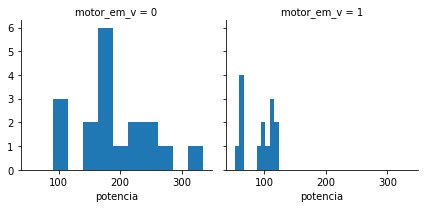

In [7]:
# Analise Exploratória
g = sns.FacetGrid(df, col='motor_em_v')
g.map(plt.hist, 'potencia', bins=10)

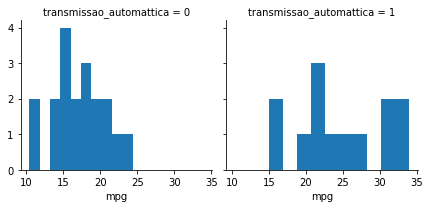

In [8]:
g = sns.FacetGrid(df, col='transmissao_automattica')
g.map(plt.hist, 'mpg', bins=10)

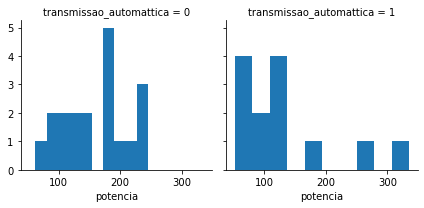

In [9]:
g = sns.FacetGrid(df, col='transmissao_automattica')
g.map(plt.hist, 'potencia', bins=10)

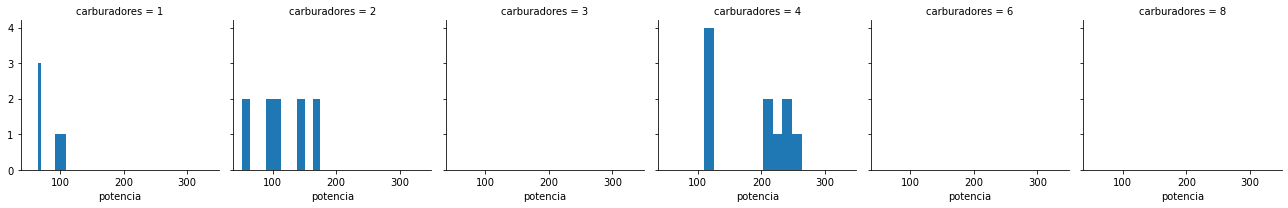

In [10]:
g = sns.FacetGrid(df, col='carburadores')
g.map(plt.hist, 'potencia', bins=10)

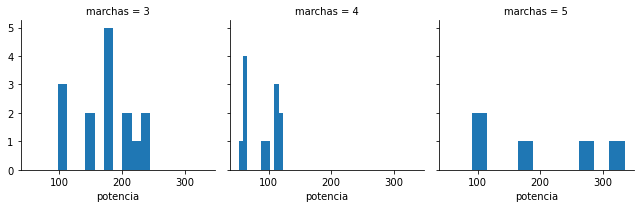

In [11]:
g = sns.FacetGrid(df, col='marchas')
g.map(plt.hist, 'potencia', bins=10)

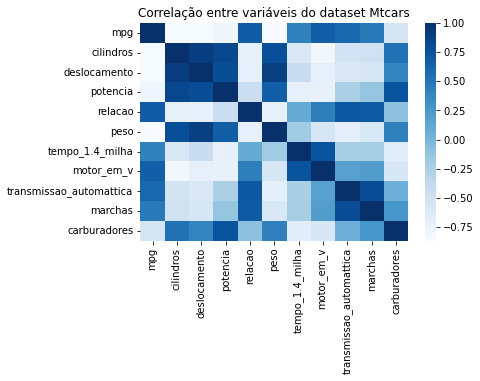

In [12]:
sns.heatmap(df.corr(), 
            annot= False,
            fmt = '.2f', 
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset Mtcars')
plt.show()

In [13]:
# Modelo de regressão simples 

X = df['potencia']
y = df['mpg']

In [14]:
simple_reg = sm.OLS(y, sm.add_constant(X)).fit()

In [15]:
print(simple_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           1.79e-07
Time:                        20:00:50   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0989      1.634     18.421      0.0

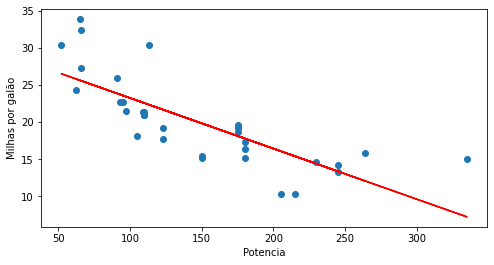

In [16]:
plt.figure(figsize=(8,4))
plt.scatter(X,y)
plt.plot(X, simple_reg.predict(), color='r')
plt.xlabel('Potencia')
plt.ylabel('Milhas por galão')
plt.show()

In [17]:
# Regressão multipla 
X = df[['potencia', 'cilindros', 'relacao', 'motor_em_v']]
y = df['mpg']

In [18]:
multi_reg = sm.OLS(y, sm.add_constant(X)).fit()

In [ ]:
print(multi_reg.summary())

## Exercício de hoje
# Busquem evoluir este modelo com a combinação de variáveis que acharem melhor. Quanto maior o R² melhor, podem alterar as variaveis, combinar e tratar da maneira que acharem melhor.


#### VOU USAR A MESMA LINHAGEM QUE O PROFESSOR E DAR CONTINUIDADE...

## META É 0.93 DE R²

In [20]:
# Modelo 1
X = df[['peso', 'cilindros', 'potencia', 'relacao', 'motor_em_v']]
y = df['mpg']

In [21]:
model1= sm.OLS(y, sm.add_constant(X)).fit()

In [22]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     28.44
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           9.22e-10
Time:                        20:03:34   Log-Likelihood:                -72.504
No. Observations:                  32   AIC:                             157.0
Df Residuals:                      26   BIC:                             165.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.5289      8.778      3.820      0.0

In [23]:
# model 2 com todas as variáveis e variável modelo transformada
df['modelo'] = df['modelo'].astype('category')
df['modelo'] = df['modelo'].cat.codes

X = df.drop('mpg', axis=1)
y = df['mpg']

In [24]:
model2= sm.OLS(y, sm.add_constant(X)).fit()

In [25]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     12.13
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           1.42e-06
Time:                        20:04:11   Log-Likelihood:                -69.776
No. Observations:                  32   AIC:                             163.6
Df Residuals:                      20   BIC:                             181.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [26]:
# Model 3 
df_copy = df.copy 

In [27]:
import numpy as np
# Trasnformação das variáveis usando logaritmo
df['peso'] = np.log(df['peso'])
df['deslocamento'] = np.log(df['deslocamento'])
df['potencia'] = np.log(df['potencia'])

In [28]:
X = df.drop('mpg', axis=1)
y = df['mpg']

In [29]:
model3 = sm.OLS(y, sm.add_constant(X)).fit()

In [ ]:
print(model3.summary())

In [31]:
# Model 4

df['relacao_peso_potencia']   = df['peso']/df['potencia']
df['relacao_peso_carb']       = df['peso']/df['carburadores']
df['relacao_peso_cilindros']  = df['peso']/df['cilindros']

In [32]:
X = df.drop('mpg', axis=1)
y = df['mpg']

In [33]:
model4 = sm.OLS(y, sm.add_constant(X)).fit()

In [34]:
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     11.98
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           3.65e-06
Time:                        20:05:15   Log-Likelihood:                -64.213
No. Observations:                  32   AIC:                             158.4
Df Residuals:                      17   BIC:                             180.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

## ATÉ AQUI FOI O PROFESSOR


In [39]:
# Model 5

df['relacao_deslocamento_marchas']   = df['deslocamento']*df['marchas'] # Possivel media de deslocamento baseado na quantidade de marchas do veiculo
df['relacao_relacao_potencia']       = df['relacao']+df['potencia'] # Relação do veículo (imagino que seja a relação do motor) agregando à potencia


In [40]:
X = df.drop('mpg', axis=1)
y = df['mpg']

In [46]:
model5 = sm.OLS(y, sm.add_constant(X)).fit()

In [47]:
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     13.25
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           2.70e-06
Time:                        20:17:07   Log-Likelihood:                -60.823
No. Observations:                  32   AIC:                             153.6
Df Residuals:                      16   BIC:                             177.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [52]:
# Model 6

df['relacao_motor_em_v__tempo_1.4_milha']   = df['motor_em_v']*df['tempo_1.4_milha'] # Valorização do motor em 1/4 milhas
df['relacao_cilindros_potencia'] = df['cilindros']*df['potencia'] # Cilindradas do veículo para melhorar a potência

In [53]:
X = df.drop('mpg', axis=1)
y = df['mpg']

In [54]:
model6 = sm.OLS(y, sm.add_constant(X)).fit()

In [55]:
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     14.67
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           3.97e-06
Time:                        20:20:43   Log-Likelihood:                -55.420
No. Observations:                  32   AIC:                             146.8
Df Residuals:                      14   BIC:                             173.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co